In [21]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
image = mpimg.imread('test.jpg')

# Grab the x and y sizes and make two copies of the image
# With one copy we'll extract only the pixels that meet our selection,
# then we'll paint those pixels red in the original image to see our selection 
# overlaid on the original.
ysize = image.shape[0]
xsize = image.shape[1]
color_select= np.copy(image)
line_image = np.copy(image)

In [2]:
# Define our color criteria
red_threshold = 200
green_threshold = 200
blue_threshold = 200
rgb_threshold = [red_threshold, green_threshold, blue_threshold]

In [22]:
# Define a triangle region of interest (Note: if you run this code, 
# Keep in mind the origin (x=0, y=0) is in the upper left in image processing
# you'll find these are not sensible values!!
# But you'll get a chance to play with them soon in a quiz ;)
left_bottom = [150, 710]
right_bottom = [1050, 710]
apex = [700, 400]


In [23]:
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)


In [24]:
# Mask pixels below the threshold
color_thresholds = (image[:,:,0] < rgb_threshold[0]) | \
                    (image[:,:,1] < rgb_threshold[1]) | \
                    (image[:,:,2] < rgb_threshold[2])

In [13]:
np.arange(0, xsize)

array([   0,    1,    2, ..., 1277, 1278, 1279])

In [25]:
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))

In [15]:
print(XX)

[[   0    1    2 ... 1277 1278 1279]
 [   0    1    2 ... 1277 1278 1279]
 [   0    1    2 ... 1277 1278 1279]
 ...
 [   0    1    2 ... 1277 1278 1279]
 [   0    1    2 ... 1277 1278 1279]
 [   0    1    2 ... 1277 1278 1279]]


In [14]:
print(YY)

[[  0   0   0 ...   0   0   0]
 [  1   1   1 ...   1   1   1]
 [  2   2   2 ...   2   2   2]
 ...
 [717 717 717 ... 717 717 717]
 [718 718 718 ... 718 718 718]
 [719 719 719 ... 719 719 719]]


In [26]:
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))

# Mask color and region selection
color_select[color_thresholds | ~region_thresholds] = [0, 0, 0]
# Color pixels red where both color and region selections met
line_image[~color_thresholds & region_thresholds] = [255, 0, 0]

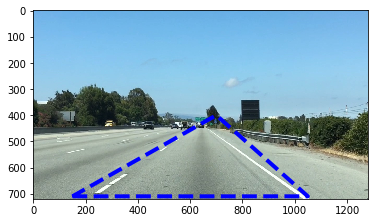

In [27]:
# Display the image and show region and color selections
plt.imshow(image)
x = [left_bottom[0], right_bottom[0], apex[0], left_bottom[0]]
y = [left_bottom[1], right_bottom[1], apex[1], left_bottom[1]]

plt.plot(x, y, 'b--', lw=4)

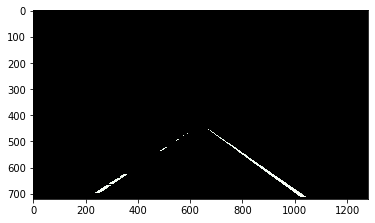

In [28]:
plt.imshow(color_select)

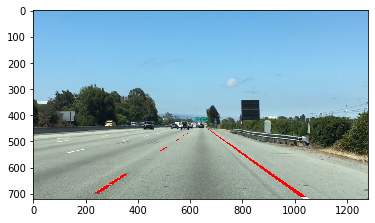

In [29]:
plt.imshow(line_image)